Your Name and PRN:
- Name: ______________________
- PRN : ______________________
- Date: ______________________

# Image Processing with Neural Network
## Assignment A05

## Tensor Flow
- Select number of layers
- Select node in each of the layers
- Choose activation function
- multi-class - Fashion MNIST dataset (all 60000 images)
- Implement one or more of following to achieve max accuracy.
    - L1/ L2 Regularization
    - Dropout
    - Batch Normalization
    - Early stopping
- Save model

In [3]:
#!/usr/bin/env pyhton3
# -*- coding 

from sklearn import datasets
from sklearn.model_selection import train_test_split
###-----------------
### Import Libraries
###-----------------
import os
import time
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import tensorflow as tf

from utils.helper import fn_plot_tf_hist, fn_plot_confusion_matrix
import gc

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

import tensorflow as tf
from utils.helper import fn_plot_tf_hist, fn_plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
import warnings
warnings.filterwarnings('ignore')

## Introduction to tensorFlow Fashion  dataset
- multi class
- reLU
- swish


In [376]:
# Global variables
inpDir = './input' # Input Stored here
outDir = './ouput' # output Here
modelDir = './models'# to save Models
subDir = 'fashion_mnist' # sub dir by dataset
RANDOM_STATE = 24
np.random.RandomState(seed = RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)
#rng = np.random.default_rng(seed = RANDOM_STATE)
#N_SAMPLE = 1000
TEST_SIZE = 0.2 # 18147 - 56*256
ALPHA = 0.001 # learning rate
NOISE = 0.2 # Error
EPOCHS = 50
BATCH_SIZE = 32

PATIENCE = 20
LR_FACTOR = 0.1
LR_PATIENCE = 10

In [7]:
# tf.random.set_seed?


In [8]:
# inpDir = './input'
# outDir = './output'

In [9]:
#set the plotting parameters
params = {'legend.fontsize': 'large',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }
    #'text.usetex':True,

plt.rcParams.update(params)
CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid')


## Load Fashion MNIST dataset


This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and [load the Fashion MNIST data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) directly from TensorFlow:

In [11]:
# train_df = pd.read_csv(os.path.join(inpDir,'fashion-mnist_train.csv'))

In [12]:
train_filename = os.path.join(inpDir, 'fashion_mnist', 'fashion-mnist_train.csv')
test_filename = os.path.join(inpDir, 'fashion_mnist', 'fashion-mnist_test.csv')

train_df = pd.read_csv(train_filename, header = 0)
test_df = pd.read_csv(test_filename, header = 0)

In [420]:
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
train_df.isnull().sum().sum(), test_df.isnull().sum().sum()

(0, 0)

In [16]:
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
#               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

class_names = {0: 'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',
               5:'Sandal', 6: 'Shirt',7: 'Sneaker', 8:'Bag', 9: 'Ankle boot'}

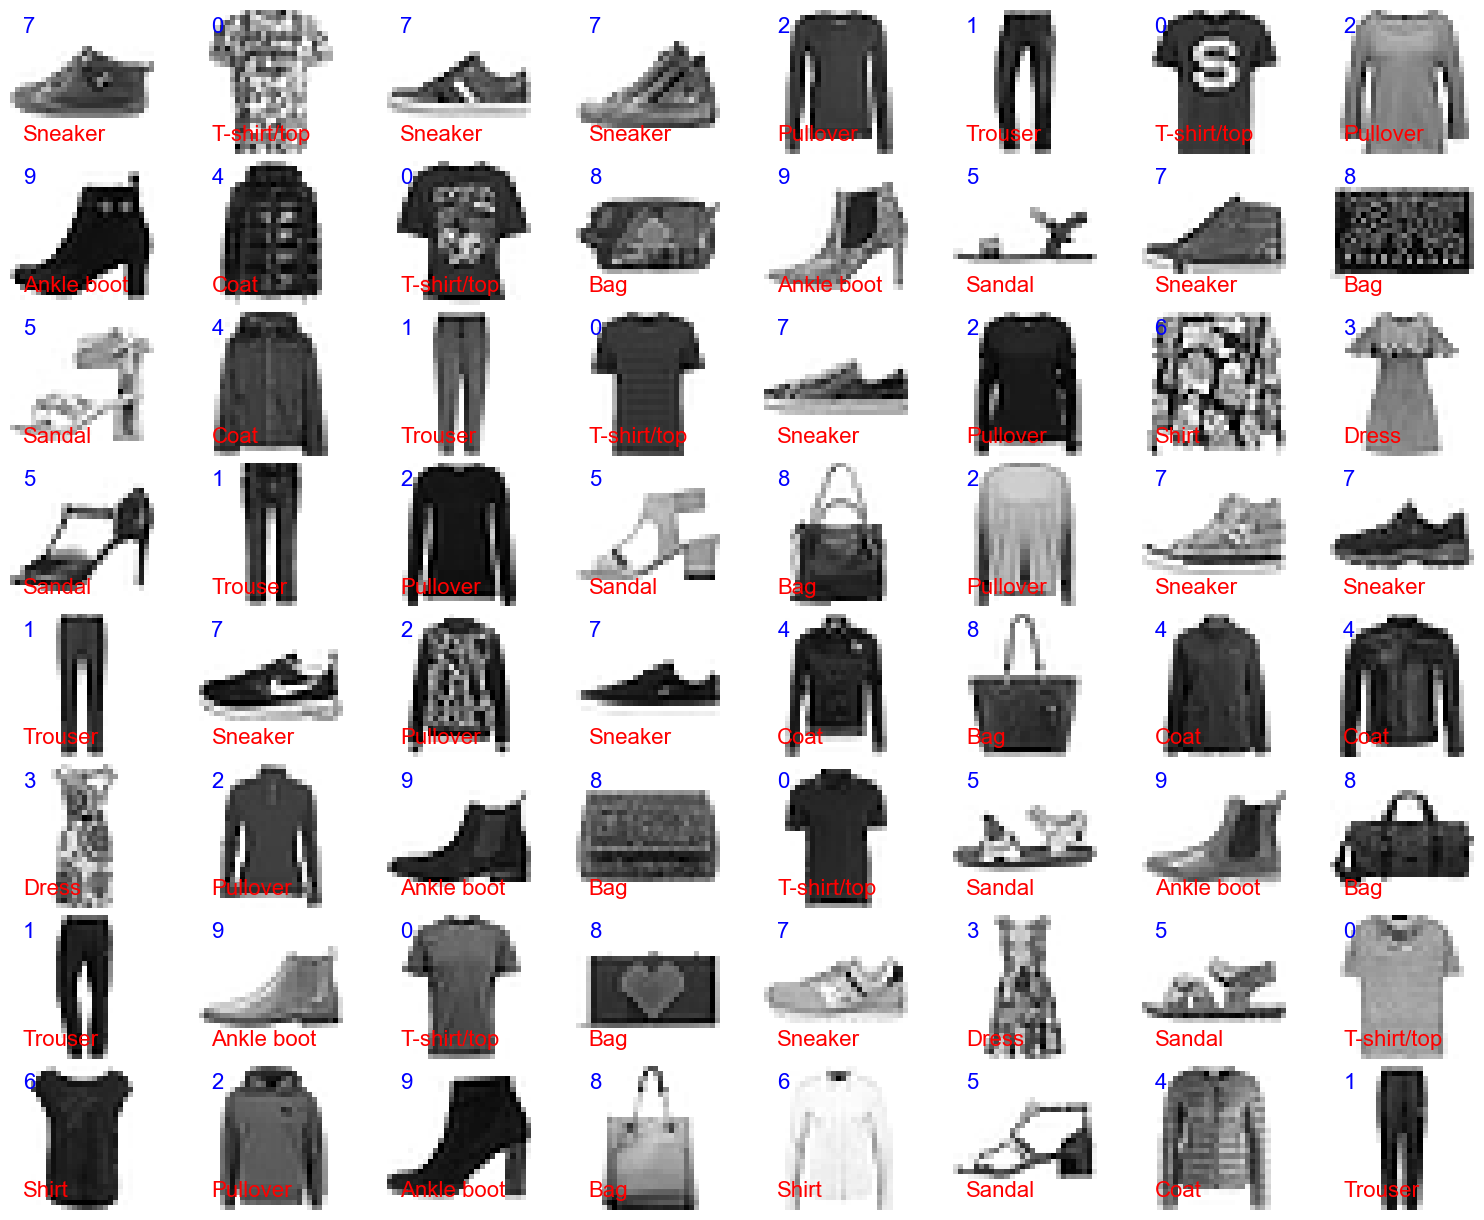

In [17]:
# sample DATA plot: Display a grid of images from the dataset along with their labels

n_rows =  8 # Number of rows to display in the grid
n_cols = 8 # Number of columns

# randomly sample 'n_rows' * n_cols images from the dataset
plot_df = train_df.sample(n = n_rows * n_cols)

#create a new figure for the grid of images with a specified size
fig = plt.figure(figsize  =(15,12))

#Adjust Margins
fig.subplots_adjust(left = 0, right = 1, bottom=0, top = 1, hspace =0.05, wspace = 0.05)
i= 0 
for idx, row in plot_df.iterrows():
    i += 1
    image = row.values[1:].reshape(28,28)

    ax = fig.add_subplot(n_rows, n_cols, i, xticks=[], yticks=[])
    #Display the image on the subplot using a binary colormap
    ax.imshow(image, cmap = plt.cm.binary, interpolation = 'nearest')

    ax.text(2,4, str(row.iloc[0]), color = 'b', fontsize=16)
    #
    ax.text(2,25, class_names[row.iloc[0]], color='r', fontsize  = 16)
#Display the entire grid of images
plt.show()

In [18]:
plot_df.shape

(64, 785)

In [19]:
# X = data_df.drop('Position',axis=1)
# y = data_df['Position']

In [20]:
# data_df.dropna(subset= ('Position'), inplace = True)


In [21]:
for col in train_df.columns:
    unq = train_df[col].unique()
    print(f'{col}, #:{len(unq)}, Values:{unq}')

label, #:10, Values:[2 9 6 0 3 4 5 8 7 1]
pixel1, #:8, Values:[ 0 14  7  3 16  1  4  2]
pixel2, #:17, Values:[ 0  1  3 10  6  2  7  5 16 14 13  9 34 15  4 11 36]
pixel3, #:27, Values:[  0   2   1  10   3   6   4   5   7  56  34  32  16  14  78  25  13   9
   8  52  35  30  23  54 226  15 106]
pixel4, #:65, Values:[  0   1   5   2   3  20  46  87   4  16  12   6  64  36  52  13   7 164
 110  14  92 106 120 105  53  70   9  23  49  25  26  34 121  21  17  10
  41  18  28  80  56 144  22  54  55  50  90 150  19 109  83 132  48  11
  32 145  39  96  15  58   8  68  82 146  86]
pixel5, #:103, Values:[  0   2   4   1   5   3  26  14  39  62  15  16  84   7  88  41  65  17
  35  61  11  21  10   6  18 119 162 106  34  12 217  33  24  37  13 185
  38  71  73   9  40  56  68 171  89  97  91  23  59  42  77 103  29 148
 140  31  45 201   8  95 133  80  44  43  27  20  32  58 123  22 116  66
  60  53 145  85 100  54 210 166 113  19  28 227  30  51  64  96  75  70
  90  82 115 153  36 169  92 110 

In [22]:
train_df.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [23]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [24]:
# num_cols = data_df.select_dtypes(exclude='object')

In [25]:
# num_cols.info()

In [26]:
X_data = train_df.drop('label',axis=1).to_numpy()
y_data = train_df['label'].to_numpy()


## Split Data in test train

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=TEST_SIZE,stratify = y_data, random_state=RANDOM_STATE)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((48000, 784), (12000, 784), (48000,), (12000,))

In [29]:
X_valid = test_df.drop('label', axis=1).to_numpy()
y_valid = test_df['label'].to_numpy()

In [30]:
type(X_train), type(X_test), type(y_train), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [31]:
X_train.shape, X_test.shape, X_valid.shape, y_train.shape, y_test.shape, y_valid.shape

((48000, 784), (12000, 784), (10000, 784), (48000,), (12000,), (10000,))

In [32]:
# Normalize data beetween [0-1]
X_train = X_train / 255.0
X_test = X_test / 255.0
X_valid = X_valid / 255.0

In [33]:
# # to delete the data which not useful any more
# del train_df, test_df, X_train , X_test, X_valid, X_data, y_data
# gc.collect()
# gc.collect()

In [34]:
# mm = MinMaxScaler()
# X_train = mm.fit_transform(X_train)
# X_test = mm.transform(X_test)

In [35]:
X_train.shape

(48000, 784)

In [418]:
784/2/4




98.0

## Converting  to dataset

* In TensorFlow, Dataset.from_tensor_slices is a method used *
* to create a dataset from a tensor or a list of tensors.*
* It is part of TensorFlow's tf.data API,* 
* which provides tools for building scalable input pipelines.*
*This method allows you to create a dataset from your data (usually stored in tensors or numpy arrays)*
*and slice it into individual elements.*
* These elements can then be fed into a model for training or evaluation.*

In [38]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))# converting numpy data to tensor dataset

In [39]:
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))# converting numpy data to tensor dataset

In [40]:
valid_ds = tf.data.Dataset.from_tensor_slices((X_valid, y_valid))

In [41]:
train_shape = X_train.shape
test_shape = X_test.shape
valid_shape = X_valid.shape

* deleting the dataset and freeing the space 

In [43]:
# import gc
# del data_df, X_train, X_test, y_train, y_test
# gc.collect()


## Preprocessing And Batching 

In [45]:
# shuffle and batch the dataset
# By chaining these operations(shuffle and batch),the dataset is shuffle first
# and then divided into batches , making it ready for training
train_ds = train_ds.shuffle(buffer_size  = train_shape[0]).batch(BATCH_SIZE) # gives two output X_tensor , y_tensor depends on Batch Size
test_ds = test_ds.shuffle(buffer_size  = test_shape[0]).batch(BATCH_SIZE)
valid_ds = valid_ds.shuffle(buffer_size  = valid_shape[0]).batch(BATCH_SIZE)

In [46]:
#Optimize for performance
# cache the DATA to avoid redundant processing
# repeat the dataset for multiple epochs
# Prefetch data to overlap preprocessing and model execution
train_ds = train_ds.cache().prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size = tf.data.AUTOTUNE)
valid_ds = valid_ds.cache().prefetch(buffer_size = tf.data.AUTOTUNE)

*To create a variable with X_train.shape[1] value*

In [48]:
# input_shape = (X_train.shape[1])
# input_shape


In [49]:
# initializer = tf.keras.initializers.GlorotUniform(seed = RANDOM_STATE)
# optimizer  = tf.keras.optimizers.Adam(learning_rate=ALPHA)

Prepare Model

Functional  API

In [51]:
inputs = tf.keras.Input(shape=(train_shape[1],), name = 'input')
x = tf.keras.layers.Dense(392, 
                         activation = tf.keras.activations.relu,
                          #kernel_initializer=initializer,
                         name = 'fc_1')(inputs)
x = tf.keras.layers.Dense(196, 
                         activation = tf.keras.activations.relu,
                          #kernel_initializer=initializer,
                         name = 'fc_2')(x)
x = tf.keras.layers.Dense(98, 
                         activation = tf.keras.activations.relu,
                          #kernel_initializer=initializer,
                         name = 'fc_3')(x)
x = tf.keras.layers.Dense(49, 
                         activation = tf.keras.activations.relu,
                          #kernel_initializer=initializer,
                         name = 'fc_4')(x)
x = tf.keras.layers.Dense(24, 
                         activation = tf.keras.activations.relu,
                          #kernel_initializer=initializer,
                         name = 'fc_5')(x)
# x = tf.keras.layers.Dense(196, 
#                          activation = tf.keras.activations.relu,
#                          name = 'fc_6')(x)
outputs = tf.keras.layers.Dense(10,#kernel_initializer=initializer,
                                name='output')(x)
model = tf.keras.Model(inputs= inputs, outputs = outputs, name ='MNIST')

In [52]:
# model = tf.keras.Sequential([
#     tf.keras.Input(shape=(X_train.shape[1],), name = 'input'), # input layer
#     tf.keras.layers.Dense(445, activation = 'leaky_relu', name = 'fc_1'), # Hidden layer called dense in tensorflow # tf.nn.silu
#     tf.keras.layers.Dense(253, activation = 'leaky_relu',  name = 'fc_2'),# node called as unit
#     tf.keras.layers.Dense(144, activation = 'leaky_relu', name = 'fc_3'),# fully connected layer(Fc)
#     tf.keras.layers.Dense(82, activation = 'leaky_relu',  name = 'fc_4'),
#     tf.keras.layers.Dense(10, activation = 'leaky_relu',  name = 'fc_5'),
#     tf.keras.layers.Dense(10, name = 'output')
    
# ])

In [53]:
model.summary()

Model: "MNIST"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_1 (Dense)                         │ (None, 392)                 │         307,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_2 (Dense)                         │ (None, 196)                 │          77,028 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_3 (Dense)                         │ (None, 98)                  │          19,306 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_4 (Dense)                         │ (None, 49)                  │           4,851 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_5 (Dense)                         │ (None, 24)                  │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │             250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 410,355 (1.57 MB)

 Trainable params: 410,355 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True) # y_test, y_pred shape should be equal
optimizer = tf.keras.optimizers.Adam(learning_rate=ALPHA)

model.compile(optimizer = optimizer, # optimisation, loss calculation 
             loss = loss_fn,
              metrics = ['accuracy']
             )

In [55]:
# prediction = model(train_ds).numpy()
# prediction.sum()

In [56]:
# tf.nn.softmax(prediction).numpy().sum()

# Comments are alternate ways to do 

In [58]:
history = model.fit(train_ds,#x = X_train, y = y_train, 
                    validation_data = test_ds,#[X_test, y_test],
                    #batch_size = BATCH_SIZE,
                    verbose = 2,
                    epochs =EPOCHS
                   )

Epoch 1/30
1500/1500 - 9s - 6ms/step - accuracy: 0.8047 - loss: 0.5396 - val_accuracy: 0.8506 - val_loss: 0.4122
Epoch 2/30
1500/1500 - 6s - 4ms/step - accuracy: 0.8574 - loss: 0.3901 - val_accuracy: 0.8599 - val_loss: 0.3901
Epoch 3/30
1500/1500 - 6s - 4ms/step - accuracy: 0.8711 - loss: 0.3514 - val_accuracy: 0.8694 - val_loss: 0.3625
Epoch 4/30
1500/1500 - 6s - 4ms/step - accuracy: 0.8788 - loss: 0.3272 - val_accuracy: 0.8618 - val_loss: 0.3699
Epoch 5/30
1500/1500 - 6s - 4ms/step - accuracy: 0.8877 - loss: 0.3047 - val_accuracy: 0.8696 - val_loss: 0.3675
Epoch 6/30
1500/1500 - 6s - 4ms/step - accuracy: 0.8941 - loss: 0.2880 - val_accuracy: 0.8653 - val_loss: 0.3953
Epoch 7/30
1500/1500 - 6s - 4ms/step - accuracy: 0.8977 - loss: 0.2756 - val_accuracy: 0.8809 - val_loss: 0.3478
Epoch 8/30
1500/1500 - 6s - 4ms/step - accuracy: 0.9029 - loss: 0.2632 - val_accuracy: 0.8786 - val_loss: 0.3420
Epoch 9/30
1500/1500 - 6s - 4ms/step - accuracy: 0.9046 - loss: 0.2536 - val_accuracy: 0.8773 - 

,accuracy,loss,val_accuracy,val_loss
0,0.804708,0.539564,0.850583,0.412231
1,0.857417,0.390127,0.859917,0.390124
2,0.871063,0.351398,0.869417,0.362549
3,0.878771,0.327223,0.861750,0.369908
4,0.887708,0.304713,0.869583,0.367535


<Axes: >

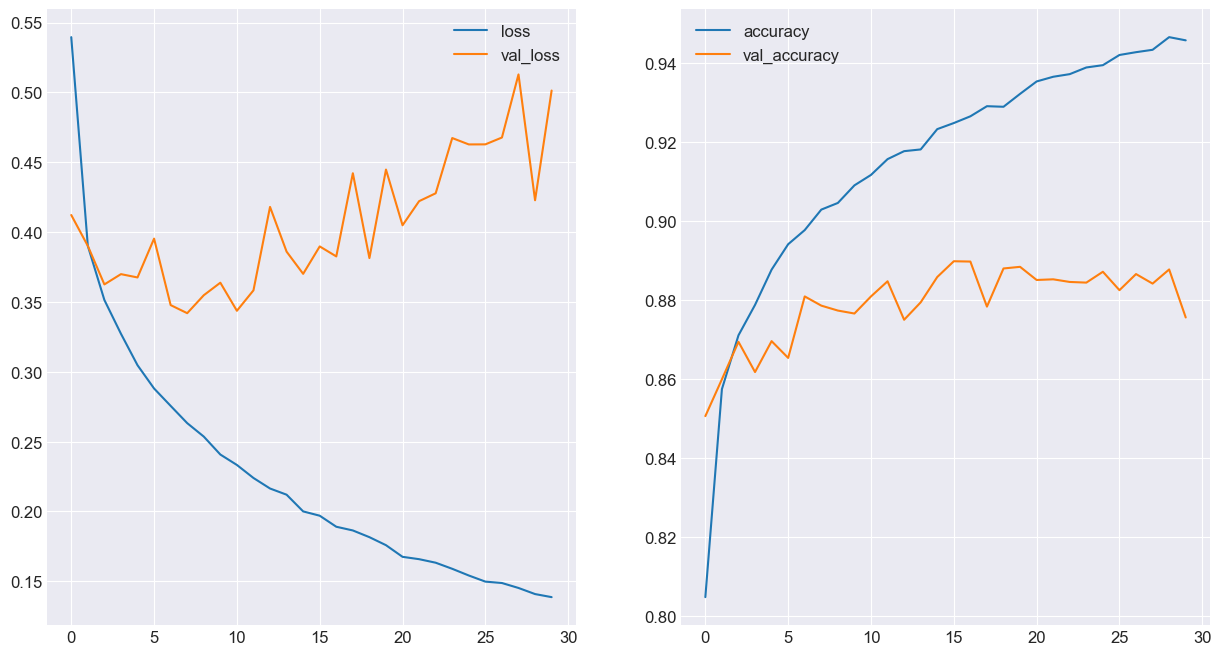

In [59]:
hist_df = pd.DataFrame(history.history) #Dictionary
display(hist_df.head())
fig, axes = plt.subplots(1,2)
hist_df.plot(y=['loss', 'val_loss'], ax= axes[0])
hist_df.plot(y=['accuracy', 'val_accuracy'], ax = axes[1])

In [60]:
pd.DataFrame(history.history)


,accuracy,loss,val_accuracy,val_loss
0,0.804708,0.539564,0.850583,0.412231
1,0.857417,0.390127,0.859917,0.390124
2,0.871063,0.351398,0.869417,0.362549
3,0.878771,0.327223,0.861750,0.369908
4,0.887708,0.304713,0.869583,0.367535
5,0.894146,0.288043,0.865333,0.395328
6,0.897729,0.275603,0.880917,0.347751
7,0.902917,0.263250,0.878583,0.341955
8,0.904604,0.253620,0.877333,0.354801
9,0.909063,0.240775,0.876583,0.363778


##  ReLU

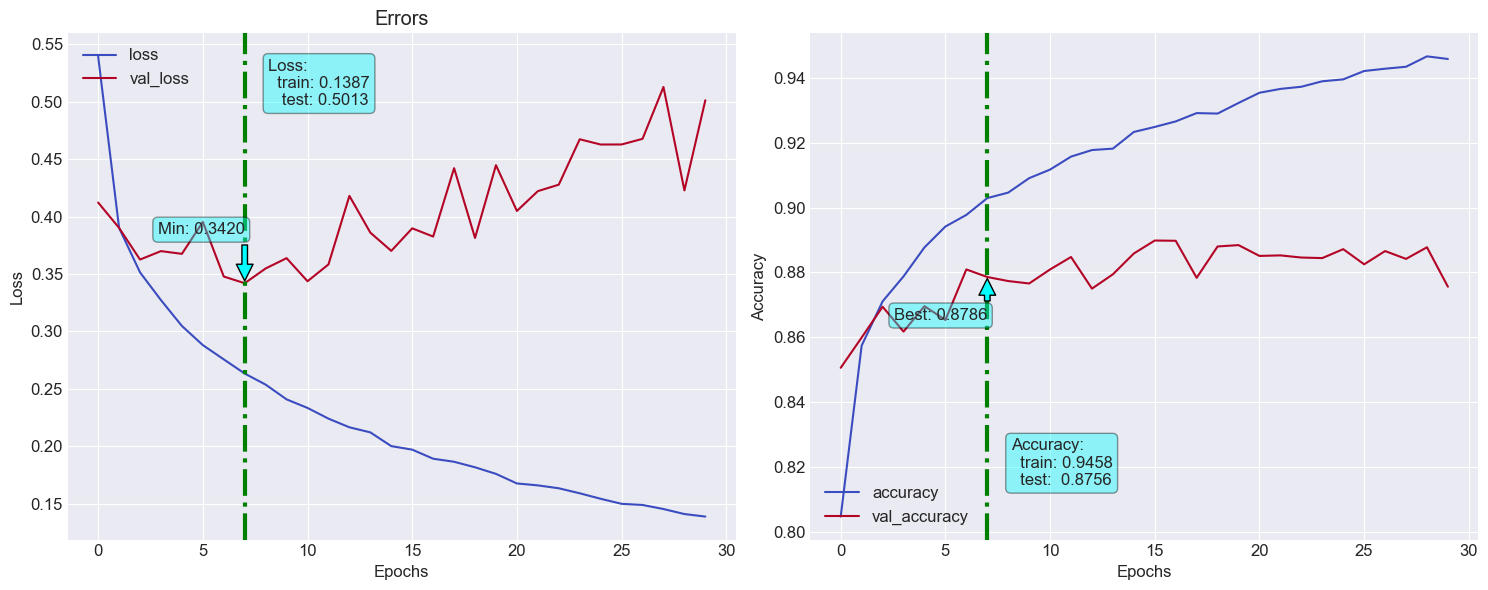

In [62]:
fn_plot_tf_hist(hist_df = hist_df)

#PREDICTION MODEL can take Softmax so we won't get any problem becoz during training model behave differently
# but during validation it behave normally
prediction_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])
prediction_model.summary()

In [64]:
# L2 Regularisation

In [65]:
initializer = tf.keras.initializers.GlorotUniform(seed = RANDOM_STATE) # normalisation remove the bias b=0
optimizer  = tf.keras.optimizers.Adam(learning_rate=ALPHA)
#Define Regularizer
regularizer = tf.keras.regularizers.L2(0.05)
inputs = tf.keras.layers.Input(shape=(34,))

inputs = tf.keras.Input(shape=(train_shape[1],), name = 'input')
x = tf.keras.layers.Dense(392, 
                         activation = tf.keras.activations.relu,
                            kernel_initializer=initializer,
                          kernel_regularizer= regularizer,
                         name = 'fc_1')(inputs)
x = tf.keras.layers.Dense(196, 
                         activation = tf.keras.activations.relu,
                          kernel_initializer=initializer,
                          kernel_regularizer = regularizer,
                          name = 'fc_2')(x)
x = tf.keras.layers.Dense(98, 
                         activation = tf.keras.activations.relu,
                          kernel_initializer=initializer,
                          kernel_regularizer= regularizer,
                         name = 'fc_3')(x)
x = tf.keras.layers.Dense(49, 
                         activation = tf.keras.activations.relu,
                          kernel_initializer=initializer,
                         name = 'fc_4')(x)
x = tf.keras.layers.Dense(24, 
                         activation = tf.keras.activations.relu,
                          kernel_initializer=initializer,
                          kernel_regularizer= regularizer,
                         name = 'fc_5')(x)
# x = tf.keras.layers.Dense(196, 
#                          activation = tf.keras.activations.relu,
#                          name = 'fc_6')(x)
outputs = tf.keras.layers.Dense(10,kernel_initializer=initializer,
                                kernel_regularizer=regularizer,
                                name='output')(x)
model = tf.keras.Model(inputs= inputs, outputs = outputs, name ='MNIST')
display(model.summary())

Model: "MNIST"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_1 (Dense)                         │ (None, 392)                 │         307,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_2 (Dense)                         │ (None, 196)                 │          77,028 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_3 (Dense)                         │ (None, 98)                  │          19,306 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_4 (Dense)                         │ (None, 49)                  │           4,851 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_5 (Dense)                         │ (None, 24)                  │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │             250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 410,355 (1.57 MB)

 Trainable params: 410,355 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

None

In [66]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True) # y_test, y_pred shape should be equal
optimizer = tf.keras.optimizers.Adam(learning_rate=ALPHA)

model.compile(optimizer = optimizer, # optimisation, loss calculation 
             loss = loss_fn,
              metrics = ['accuracy']
             )

In [67]:
history = model.fit(train_ds,#x = X_train, y = y_train, 
                    validation_data = test_ds,#[X_test, y_test],
                    #batch_size = BATCH_SIZE,
                    verbose = 2,
                    epochs =EPOCHS
                   )

Epoch 1/30
1500/1500 - 10s - 7ms/step - accuracy: 0.6354 - loss: 2.8016 - val_accuracy: 0.6585 - val_loss: 1.5690
Epoch 2/30
1500/1500 - 7s - 5ms/step - accuracy: 0.6869 - loss: 1.4257 - val_accuracy: 0.7021 - val_loss: 1.3357
Epoch 3/30
1500/1500 - 7s - 5ms/step - accuracy: 0.7034 - loss: 1.3119 - val_accuracy: 0.7182 - val_loss: 1.2451
Epoch 4/30
1500/1500 - 7s - 5ms/step - accuracy: 0.7118 - loss: 1.2456 - val_accuracy: 0.7200 - val_loss: 1.1934
Epoch 5/30
1500/1500 - 7s - 5ms/step - accuracy: 0.7172 - loss: 1.2008 - val_accuracy: 0.7224 - val_loss: 1.1592
Epoch 6/30
1500/1500 - 7s - 5ms/step - accuracy: 0.7218 - loss: 1.1674 - val_accuracy: 0.7278 - val_loss: 1.1316
Epoch 7/30
1500/1500 - 7s - 5ms/step - accuracy: 0.7260 - loss: 1.1408 - val_accuracy: 0.7321 - val_loss: 1.1088
Epoch 8/30
1500/1500 - 7s - 5ms/step - accuracy: 0.7286 - loss: 1.1193 - val_accuracy: 0.7342 - val_loss: 1.0897
Epoch 9/30
1500/1500 - 7s - 5ms/step - accuracy: 0.7309 - loss: 1.1007 - val_accuracy: 0.7377 -

,accuracy,loss,val_accuracy,val_loss
0,0.635375,2.801572,0.658500,1.569016
1,0.686854,1.425666,0.702083,1.335719
2,0.703438,1.311871,0.718167,1.245124
3,0.711833,1.245567,0.720000,1.193377
4,0.717229,1.200845,0.722417,1.159218


<Axes: >

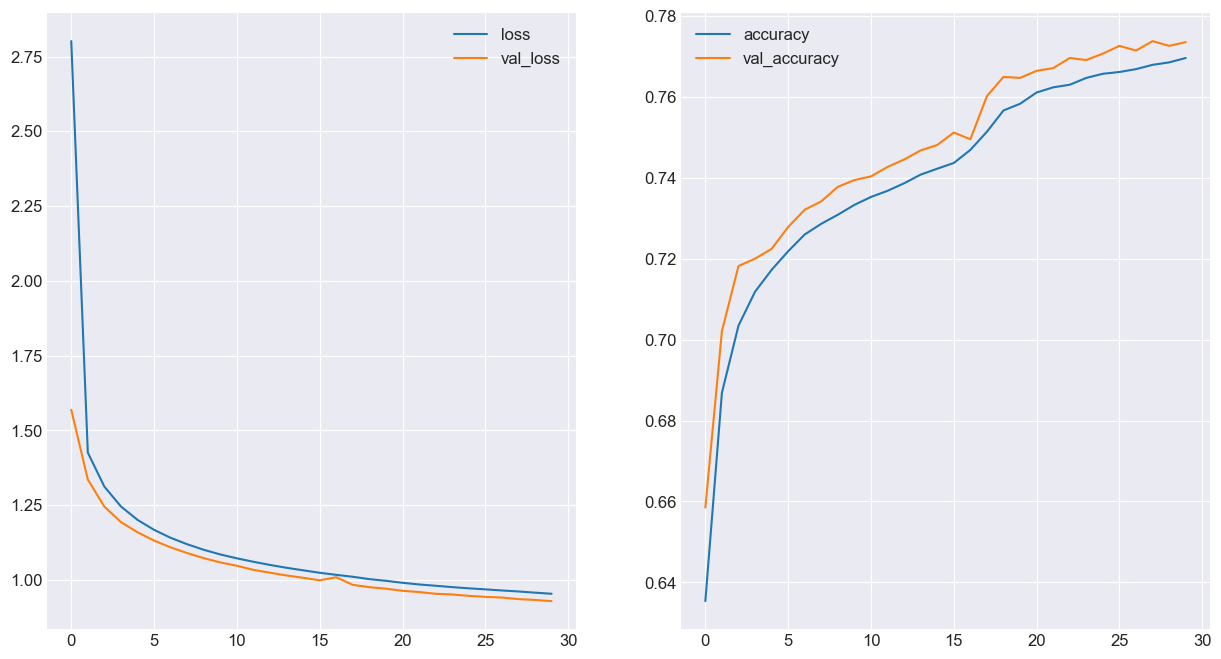

In [68]:
hist_df = pd.DataFrame(history.history) #Dictionary
display(hist_df.head())
fig, axes = plt.subplots(1,2)
hist_df.plot(y=['loss', 'val_loss'], ax= axes[0])
hist_df.plot(y=['accuracy', 'val_accuracy'], ax = axes[1])

In [69]:
pd.DataFrame(history.history)


,accuracy,loss,val_accuracy,val_loss
0,0.635375,2.801572,0.658500,1.569016
1,0.686854,1.425666,0.702083,1.335719
2,0.703438,1.311871,0.718167,1.245124
3,0.711833,1.245567,0.720000,1.193377
4,0.717229,1.200845,0.722417,1.159218
5,0.721833,1.167431,0.727833,1.131612
6,0.725979,1.140841,0.732083,1.108801
7,0.728625,1.119314,0.734167,1.089740
8,0.730854,1.100696,0.737750,1.072841
9,0.733292,1.085189,0.739417,1.058398


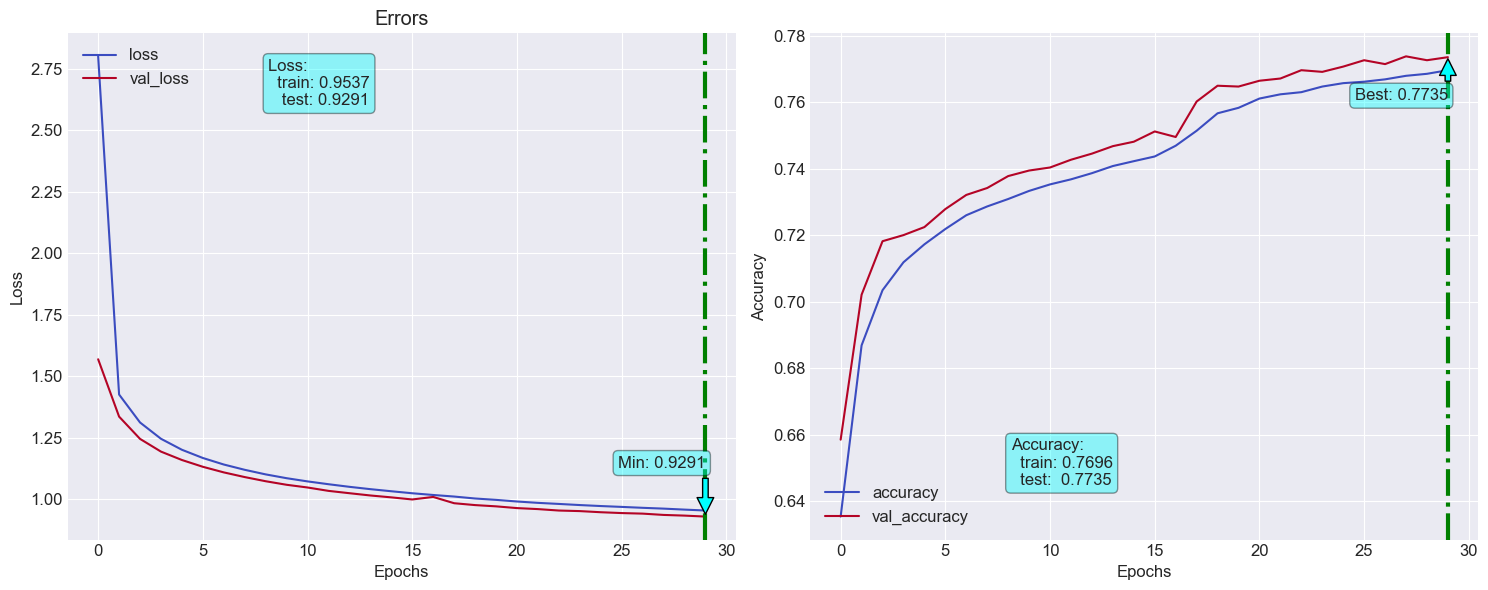

In [70]:
fn_plot_tf_hist(hist_df = hist_df)

In [71]:

initializer = tf.keras.initializers.GlorotUniform(seed = RANDOM_STATE)
optimizer  = tf.keras.optimizers.Adam(learning_rate=ALPHA)
#Define Regularizer
regularizer = tf.keras.regularizers.L2(0.05)

inputs = tf.keras.Input(shape=(train_shape[1],), name = 'input')
#Set1
x = tf.keras.layers.Dense(392, 
                         #activation = tf.keras.activations.relu,
                          kernel_initializer=initializer,
                         name = 'fc_1')(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation(activation='relu')(x)
# Set2
x = tf.keras.layers.Dense(196, 
                         #activation = tf.keras.activations.relu,
                          kernel_initializer=initializer,
                         name = 'fc_2')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation(activation='relu')(x)

x = tf.keras.layers.Dense(98, 
                         #activation = tf.keras.activations.relu,
                          kernel_initializer=initializer,
                         name = 'fc_3')(x)
x = tf.keras.layers.BatchNormalization(us)(x)
x = tf.keras.layers.Activation(activation='relu')(x)

x = tf.keras.layers.Dense(49, 
                         activation = tf.keras.activations.relu,
                          kernel_initializer=initializer,
                         name = 'fc_4')(x)

x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation(activation='relu')(x)

x = tf.keras.layers.Dense(24, 
                         activation = tf.keras.activations.relu,
                          kernel_initializer=initializer,
                         name = 'fc_5')(x)

x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation(activation='relu')(x)

# x = tf.keras.layers.Dense(196, 
#                          activation = tf.keras.activations.relu,
#                          name = 'fc_6')(x)
outputs = tf.keras.layers.Dense(10,kernel_initializer=initializer,
                                name='output')(x)
model = tf.keras.Model(inputs= inputs, outputs = outputs, name ='MNIST')
display(model.summary())

Model: "MNIST"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_1 (Dense)                         │ (None, 392)                 │         307,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 392)                 │           1,568 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 392)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_2 (Dense)                         │ (None, 196)                 │          77,028 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 196)                 │             784 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 196)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_3 (Dense)                         │ (None, 98)                  │          19,306 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 98)                  │             392 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 98)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_4 (Dense)                         │ (None, 49)                  │           4,851 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 49)                  │             196 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 49)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_5 (Dense)                         │ (None, 24)                  │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 24)                  │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │             250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 413,391 (1.58 MB)

 Trainable params: 411,873 (1.57 MB)

 Non-trainable params: 1,518 (5.93 KB)

None

In [72]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True) # y_test, y_pred shape should be equal
optimizer = tf.keras.optimizers.Adam(learning_rate=ALPHA)

model.compile(optimizer = optimizer, # optimisation, loss calculation 
             loss = loss_fn,
              metrics = ['accuracy']
             )

In [73]:
history = model.fit(train_ds,#x = X_train, y = y_train, 
                    validation_data = test_ds,#[X_test, y_test],
                    #batch_size = BATCH_SIZE,
                    verbose = 2,
                    epochs =EPOCHS
                   )

Epoch 1/30
1500/1500 - 14s - 9ms/step - accuracy: 0.7950 - loss: 0.6233 - val_accuracy: 0.8476 - val_loss: 0.4118
Epoch 2/30
1500/1500 - 9s - 6ms/step - accuracy: 0.8512 - loss: 0.4173 - val_accuracy: 0.8417 - val_loss: 0.4383
Epoch 3/30
1500/1500 - 9s - 6ms/step - accuracy: 0.8686 - loss: 0.3606 - val_accuracy: 0.8600 - val_loss: 0.3910
Epoch 4/30
1500/1500 - 9s - 6ms/step - accuracy: 0.8832 - loss: 0.3222 - val_accuracy: 0.8715 - val_loss: 0.3694
Epoch 5/30
1500/1500 - 9s - 6ms/step - accuracy: 0.8938 - loss: 0.2915 - val_accuracy: 0.8664 - val_loss: 0.3906
Epoch 6/30
1500/1500 - 9s - 6ms/step - accuracy: 0.9037 - loss: 0.2644 - val_accuracy: 0.8559 - val_loss: 0.4134
Epoch 7/30
1500/1500 - 9s - 6ms/step - accuracy: 0.9124 - loss: 0.2388 - val_accuracy: 0.8653 - val_loss: 0.3986
Epoch 8/30
1500/1500 - 9s - 6ms/step - accuracy: 0.9193 - loss: 0.2171 - val_accuracy: 0.8673 - val_loss: 0.4229
Epoch 9/30
1500/1500 - 9s - 6ms/step - accuracy: 0.9256 - loss: 0.1992 - val_accuracy: 0.8687 -

,accuracy,loss,val_accuracy,val_loss
0,0.795021,0.623256,0.847583,0.411805
1,0.851167,0.417342,0.841667,0.438269
2,0.868604,0.360588,0.860000,0.390985
3,0.883208,0.322236,0.871500,0.369449
4,0.893833,0.291458,0.866417,0.390609


<Axes: >

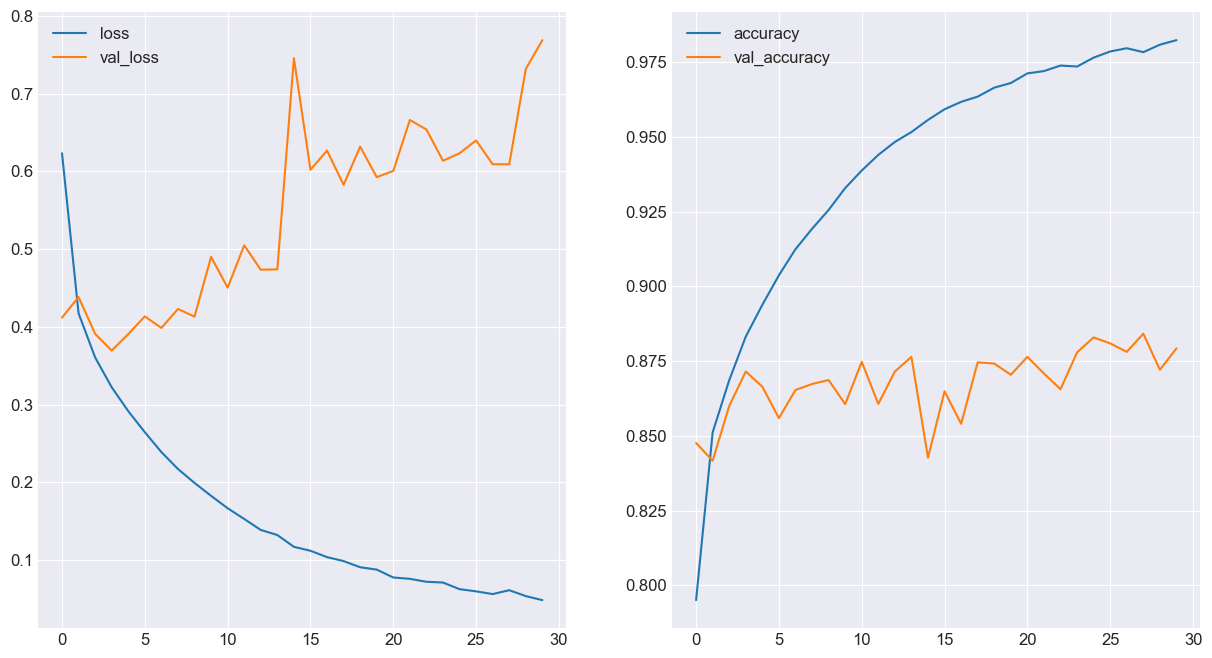

In [74]:
hist_df = pd.DataFrame(history.history) #Dictionary
display(hist_df.head())
fig, axes = plt.subplots(1,2)
hist_df.plot(y=['loss', 'val_loss'], ax= axes[0])
hist_df.plot(y=['accuracy', 'val_accuracy'], ax = axes[1])

In [75]:
pd.DataFrame(history.history)


,accuracy,loss,val_accuracy,val_loss
0,0.795021,0.623256,0.847583,0.411805
1,0.851167,0.417342,0.841667,0.438269
2,0.868604,0.360588,0.860000,0.390985
3,0.883208,0.322236,0.871500,0.369449
4,0.893833,0.291458,0.866417,0.390609
5,0.903708,0.264417,0.855917,0.413423
6,0.912437,0.238817,0.865333,0.398550
7,0.919250,0.217074,0.867333,0.422943
8,0.925563,0.199164,0.868667,0.413058
9,0.932875,0.182562,0.860583,0.490011


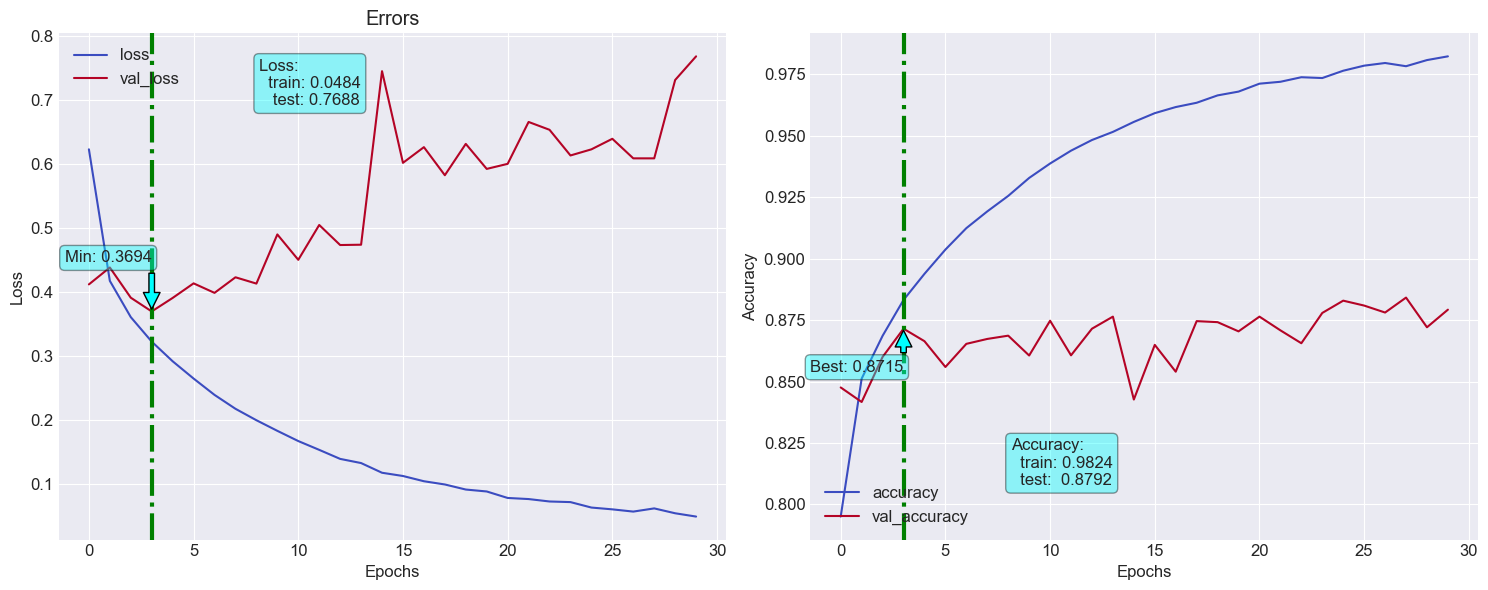

In [76]:
fn_plot_tf_hist(hist_df = hist_df)

# Bias=False, Batch Normalisation

In [307]:

initializer = tf.keras.initializers.GlorotUniform(seed = RANDOM_STATE)
optimizer  = tf.keras.optimizers.Adam(learning_rate=ALPHA)
#Define Regularizer
regularizer = tf.keras.regularizers.L2(0.05)

inputs = tf.keras.Input(shape=(train_shape[1],), name = 'input')
#Set1
x = tf.keras.layers.Dense(392, 
                         #activation = tf.keras.activations.relu,
                          kernel_initializer=initializer,
                          use_bias=False,
                         name = 'fc_1')(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation(activation='relu')(x)
# Set2
x = tf.keras.layers.Dense(196, 
                         #activation = tf.keras.activations.relu,
                          kernel_initializer=initializer,
                          use_bias=False,
                         name = 'fc_2')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation(activation='relu')(x)

x = tf.keras.layers.Dense(98, 
                         #activation = tf.keras.activations.relu,
                          kernel_initializer=initializer,
                          use_bias=False,
                         name = 'fc_3')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation(activation='relu')(x)

x = tf.keras.layers.Dense(49, 
                         #activation = tf.keras.activations.relu,
                          kernel_initializer=initializer,
                          use_bias=False,
                         name = 'fc_4')(x)

x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation(activation='relu')(x)

x = tf.keras.layers.Dense(24, 
                         #activation = tf.keras.activations.relu,
                          kernel_initializer=initializer,
                          use_bias=False,
                         name = 'fc_5')(x)

x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation(activation='relu')(x)

# x = tf.keras.layers.Dense(196, 
#                          activation = tf.keras.activations.relu,
#                          name = 'fc_6')(x)
outputs = tf.keras.layers.Dense(10,kernel_initializer=initializer,
                                use_bias=False,
                                name='output')(x)
model1 = tf.keras.Model(inputs= inputs, outputs = outputs, name ='MNIST')
display(model1.summary())

Model: "MNIST"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_1 (Dense)                         │ (None, 392)                 │         307,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 392)                 │           1,568 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 392)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_2 (Dense)                         │ (None, 196)                 │          76,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 196)                 │             784 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 196)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_3 (Dense)                         │ (None, 98)                  │          19,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 98)                  │             392 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 98)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_4 (Dense)                         │ (None, 49)                  │           4,802 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 49)                  │             196 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 49)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_5 (Dense)                         │ (None, 24)                  │           1,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 24)                  │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │             240 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 412,622 (1.57 MB)

 Trainable params: 411,104 (1.57 MB)

 Non-trainable params: 1,518 (5.93 KB)

None

In [309]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True) # y_test, y_pred shape should be equal
optimizer = tf.keras.optimizers.Adam(learning_rate=ALPHA)

model1.compile(optimizer = optimizer, # optimisation, loss calculation 
             loss = loss_fn,
              metrics = ['accuracy']
             )

In [311]:
history = model1.fit(train_ds,#x = X_train, y = y_train, 
                    validation_data = test_ds,#[X_test, y_test],
                    batch_size = BATCH_SIZE,
                    verbose = 2,
                    epochs =EPOCHS
                   )


Epoch 1/30
1500/1500 - 12s - 8ms/step - accuracy: 0.8096 - loss: 0.5707 - val_accuracy: 0.8429 - val_loss: 0.4291
Epoch 2/30
1500/1500 - 8s - 5ms/step - accuracy: 0.8568 - loss: 0.3975 - val_accuracy: 0.8534 - val_loss: 0.4071
Epoch 3/30
1500/1500 - 8s - 5ms/step - accuracy: 0.8766 - loss: 0.3432 - val_accuracy: 0.8625 - val_loss: 0.3750
Epoch 4/30
1500/1500 - 8s - 5ms/step - accuracy: 0.8901 - loss: 0.3024 - val_accuracy: 0.8741 - val_loss: 0.3578
Epoch 5/30
1500/1500 - 8s - 5ms/step - accuracy: 0.9025 - loss: 0.2709 - val_accuracy: 0.8748 - val_loss: 0.3540
Epoch 6/30
1500/1500 - 8s - 5ms/step - accuracy: 0.9108 - loss: 0.2441 - val_accuracy: 0.8758 - val_loss: 0.3558
Epoch 7/30
1500/1500 - 8s - 5ms/step - accuracy: 0.9197 - loss: 0.2214 - val_accuracy: 0.8719 - val_loss: 0.3678
Epoch 8/30
1500/1500 - 8s - 5ms/step - accuracy: 0.9277 - loss: 0.1996 - val_accuracy: 0.8690 - val_loss: 0.3942
Epoch 9/30
1500/1500 - 8s - 5ms/step - accuracy: 0.9334 - loss: 0.1805 - val_accuracy: 0.8817 -

In [ ]:
# hist_df = pd.DataFrame(history.history) #Dictionary
# display(hist_df.head())
# fig, axes = plt.subplots(1,2)
# hist_df.plot(y=['loss', 'val_loss'], ax= axes[0])
# hist_df.plot(y=['accuracy', 'val_accuracy'], ax = axes[1])


In [303]:
hist_df = pd.DataFrame(history.history)


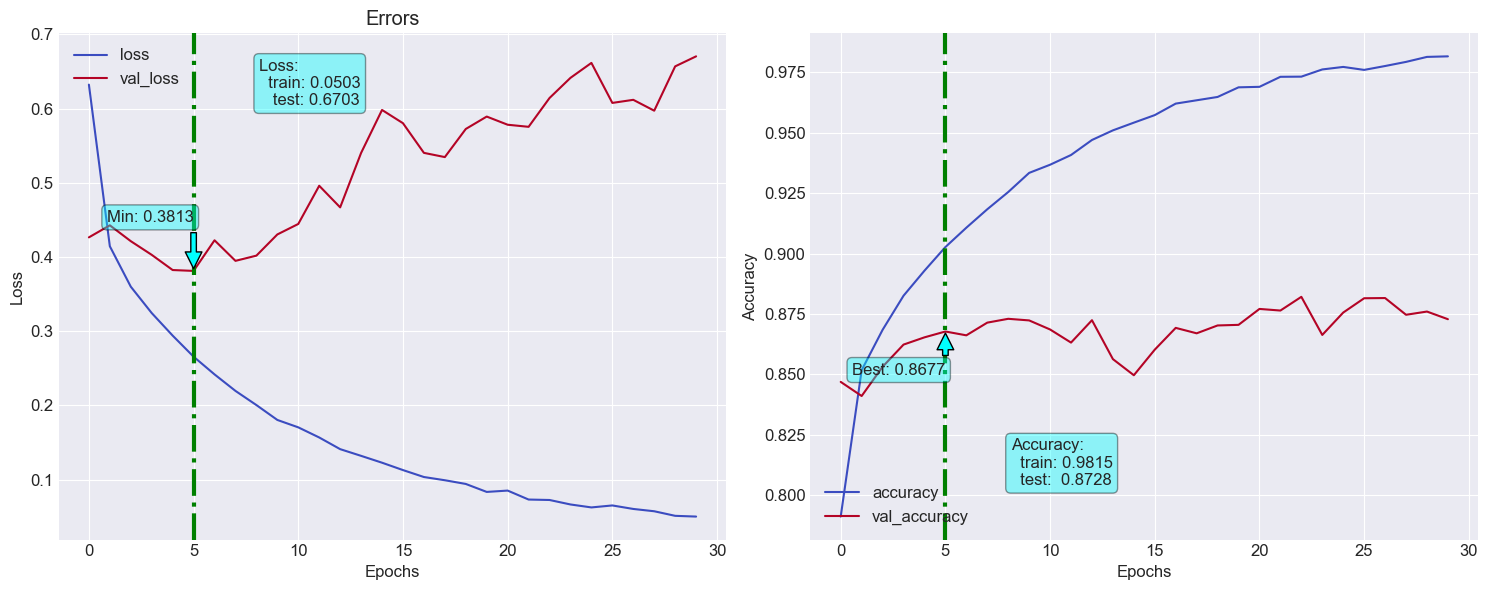

In [305]:
fn_plot_tf_hist(hist_df = hist_df)

In [ ]:
del model1


# DropOut

In [362]:
# BatchNormalization , Activation, Dropout, Early Stopping, Decay Learning rate

In [354]:
DOR0 = 0.1
DOR1 = 0.2
DOR2 = 0.3
DOR3 = 0.4
DOR4 = 0.5
DOR5 = 0.6

initializer = tf.keras.initializers.GlorotUniform(seed = RANDOM_STATE)
optimizer  = tf.keras.optimizers.Adam(learning_rate=ALPHA)
#Define Regularizer
regularizer = tf.keras.regularizers.L2(0.05)

inputs = tf.keras.Input(shape=(train_shape[1],), name = 'input')
#Set1
x = tf.keras.layers.Dense(392, 
                         #activation = tf.keras.activations.relu,
                          kernel_initializer=initializer,
                          #use_bias=False,
                         name = 'fc_1')(inputs)
#x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation(activation='relu')(x)
x = tf.keras.layers.Dropout(rate = DOR5)(x)
# Set2
x = tf.keras.layers.Dense(196, 
                         #activation = tf.keras.activations.relu,
                          kernel_initializer=initializer,
                          use_bias=False,
                         name = 'fc_2')(x)
#x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation(activation='relu')(x)
x = tf.keras.layers.Dropout(rate = DOR4)(x)

x = tf.keras.layers.Dense(98, 
                         #activation = tf.keras.activations.relu,
                          kernel_initializer=initializer,
                          use_bias=False,
                         name = 'fc_3')(x)
#x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation(activation='relu')(x)
x = tf.keras.layers.Dropout(rate = DOR3)(x)

x = tf.keras.layers.Dense(49, 
                         #activation = tf.keras.activations.relu,
                          kernel_initializer=initializer,
                          use_bias=False,
                         name = 'fc_4')(x)

#x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation(activation='relu')(x)
x = tf.keras.layers.Dropout(rate = DOR2)(x)

x = tf.keras.layers.Dense(24, 
                         #activation = tf.keras.activations.relu,
                          kernel_initializer=initializer,
                          use_bias=False,
                         name = 'fc_5')(x)

#x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation(activation='relu')(x)
x = tf.keras.layers.Dropout(rate = DOR1)(x)

# x = tf.keras.layers.Dense(196, 
#                          activation = tf.keras.activations.relu,
#                          name = 'fc_6')(x)
outputs = tf.keras.layers.Dense(10,kernel_initializer=initializer,
                                use_bias=False,
                                name='output')(x)
model2 = tf.keras.Model(inputs= inputs, outputs = outputs, name ='MNIST')
display(model2.summary())

Model: "MNIST"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_1 (Dense)                         │ (None, 392)                 │         307,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_38 (Activation)           │ (None, 392)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 392)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_2 (Dense)                         │ (None, 196)                 │          76,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_39 (Activation)           │ (None, 196)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 196)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_3 (Dense)                         │ (None, 98)                  │          19,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_40 (Activation)           │ (None, 98)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 98)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_4 (Dense)                         │ (None, 49)                  │           4,802 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_41 (Activation)           │ (None, 49)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 49)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_5 (Dense)                         │ (None, 24)                  │           1,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_42 (Activation)           │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │             240 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 409,978 (1.56 MB)

 Trainable params: 409,978 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

None

In [356]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True) # y_test, y_pred shape should be equal
optimizer = tf.keras.optimizers.Adam(learning_rate=ALPHA)

model2.compile(optimizer = optimizer, # optimisation, loss calculation 
             loss = loss_fn,
              metrics = ['accuracy']
             )

In [358]:
history = model2.fit(train_ds,#x = X_train, y = y_train, 
                    validation_data = test_ds,#[X_test, y_test],
                    batch_size = BATCH_SIZE,
                    verbose = 2,
                    epochs =EPOCHS
                   )


Epoch 1/30
1500/1500 - 9s - 6ms/step - accuracy: 0.5218 - loss: 1.2069 - val_accuracy: 0.6949 - val_loss: 0.7094
Epoch 2/30
1500/1500 - 7s - 5ms/step - accuracy: 0.6850 - loss: 0.8075 - val_accuracy: 0.7232 - val_loss: 0.6278
Epoch 3/30
1500/1500 - 7s - 5ms/step - accuracy: 0.7099 - loss: 0.7281 - val_accuracy: 0.7349 - val_loss: 0.5893
Epoch 4/30
1500/1500 - 7s - 5ms/step - accuracy: 0.7197 - loss: 0.6966 - val_accuracy: 0.7382 - val_loss: 0.5821
Epoch 5/30
1500/1500 - 7s - 5ms/step - accuracy: 0.7271 - loss: 0.6694 - val_accuracy: 0.7452 - val_loss: 0.5649
Epoch 6/30
1500/1500 - 7s - 5ms/step - accuracy: 0.7381 - loss: 0.6476 - val_accuracy: 0.7448 - val_loss: 0.5535
Epoch 7/30
1500/1500 - 7s - 5ms/step - accuracy: 0.7427 - loss: 0.6414 - val_accuracy: 0.7492 - val_loss: 0.5365
Epoch 8/30
1500/1500 - 7s - 5ms/step - accuracy: 0.7508 - loss: 0.6331 - val_accuracy: 0.7821 - val_loss: 0.5545
Epoch 9/30
1500/1500 - 7s - 5ms/step - accuracy: 0.7640 - loss: 0.6134 - val_accuracy: 0.8057 - 

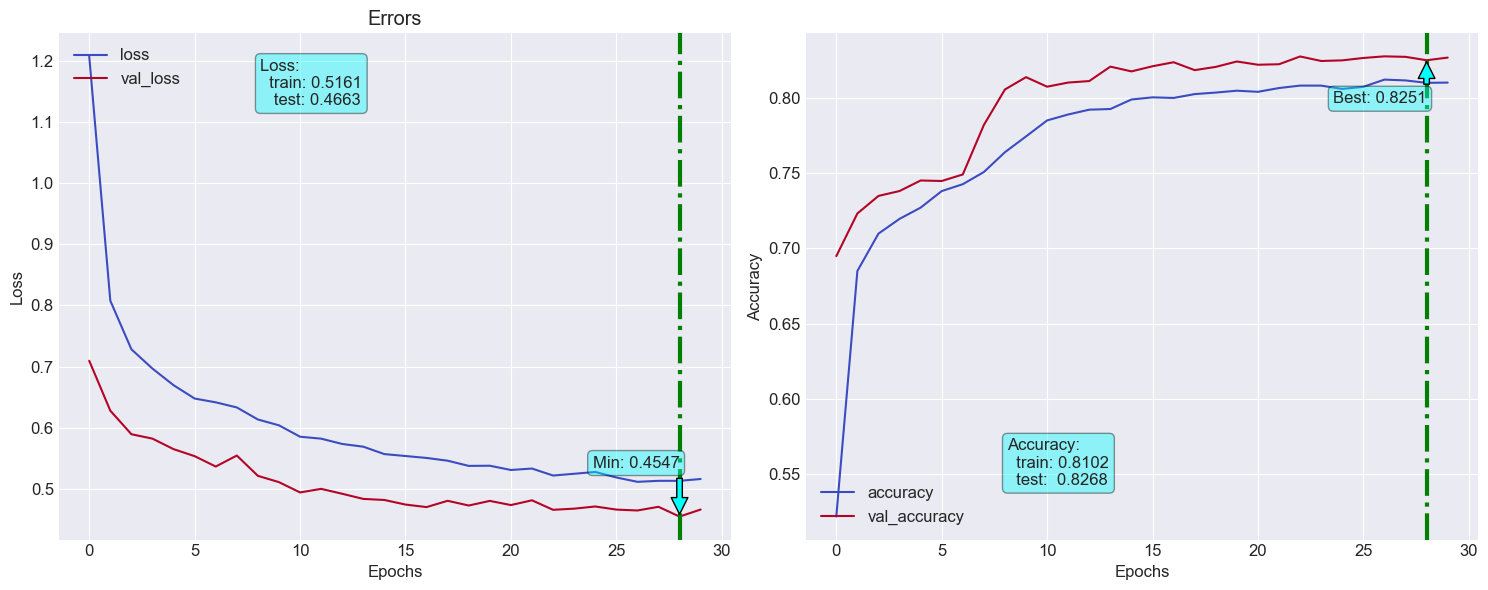

In [360]:
# Dropout = 0.6-0.5-0.4-0.3-0.2
hist_df = pd.DataFrame(history.history)
fn_plot_tf_hist(hist_df = hist_df)

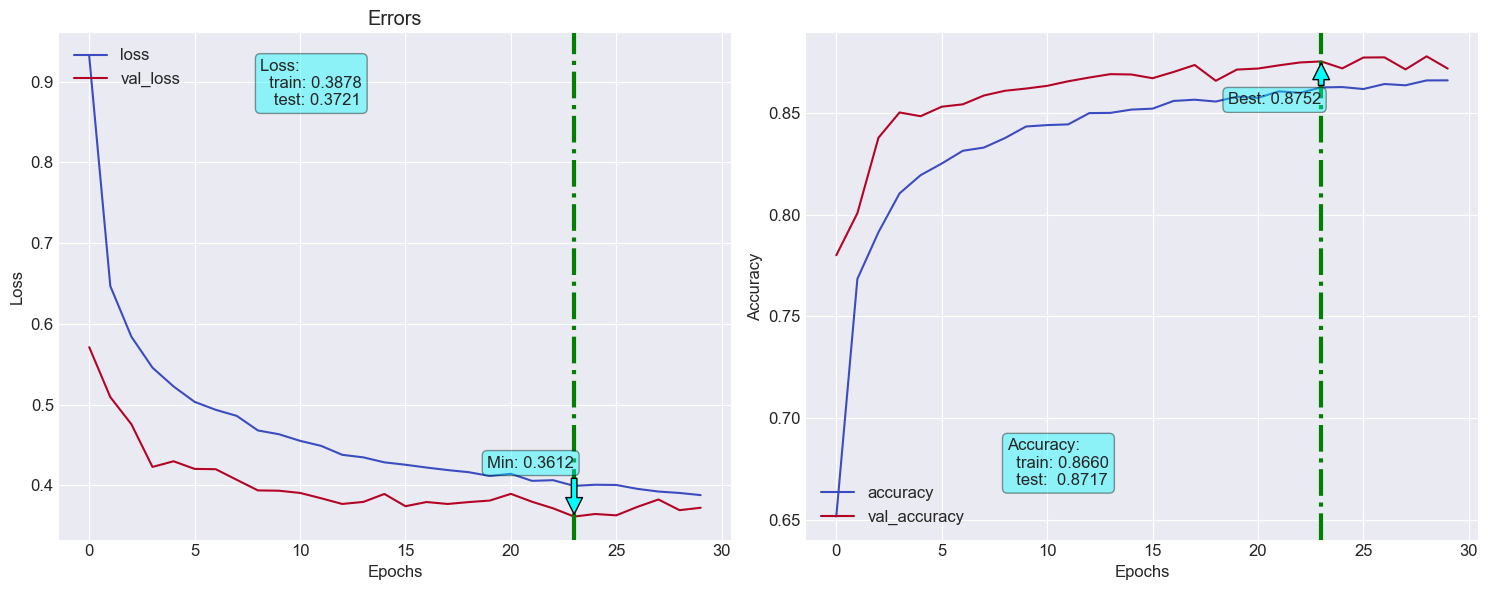

In [352]:
# Dropout = 0.5-0.4-0.3-0.2-0.1
hist_df = pd.DataFrame(history.history)
fn_plot_tf_hist(hist_df = hist_df)

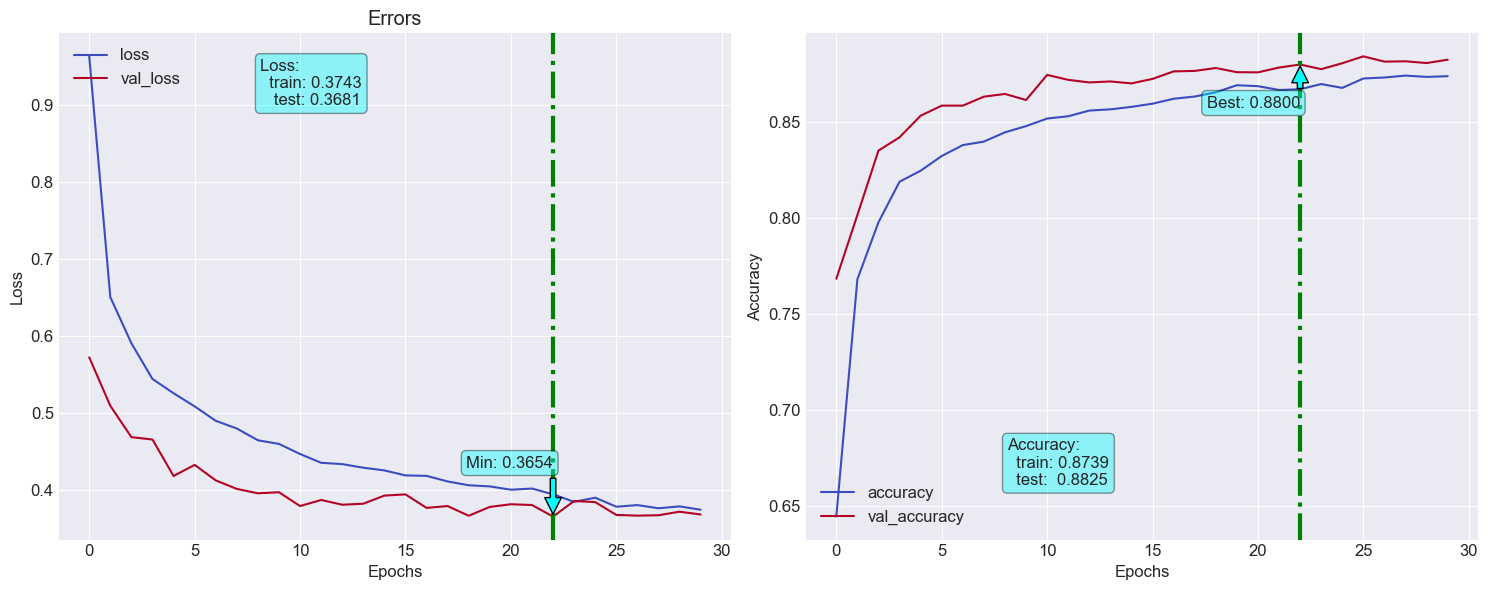

In [343]:
# Dropout = 0.3-0.3-0.3-0.3-0.3
hist_df = pd.DataFrame(history.history)
fn_plot_tf_hist(hist_df = hist_df)

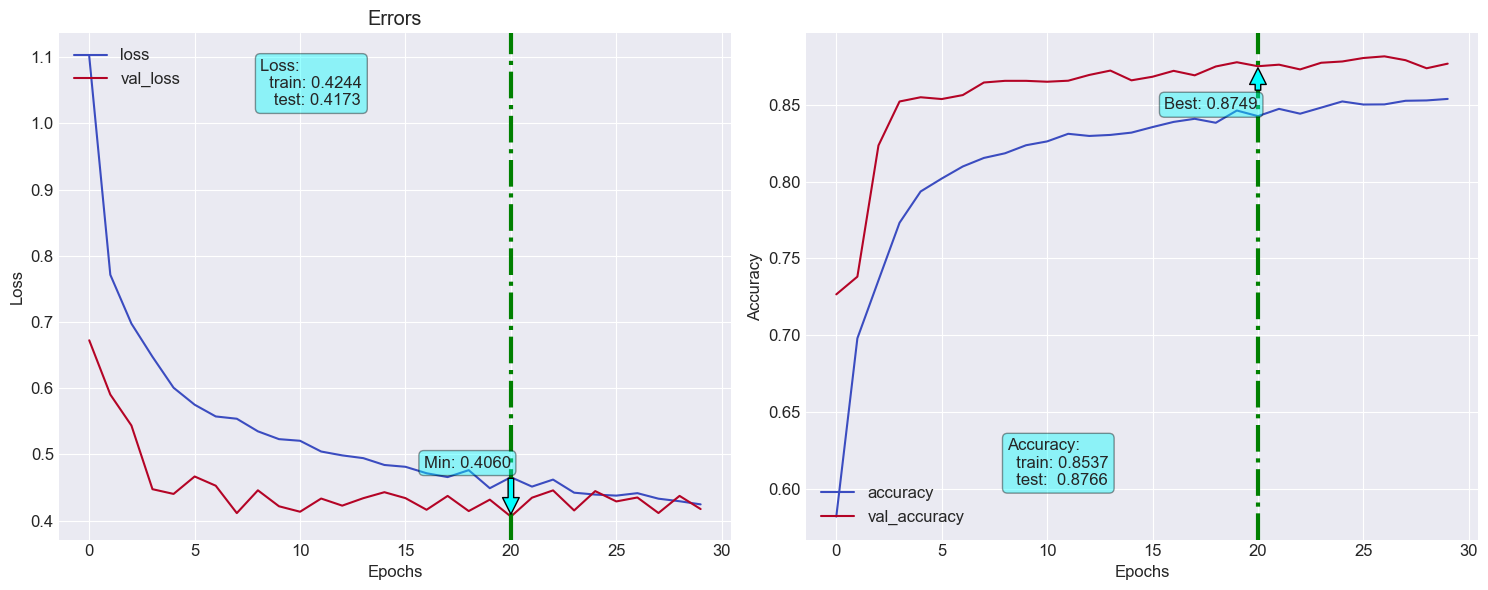

In [336]:
# Dropout = 0.1-0.2-0.3-0.4-0.5
hist_df = pd.DataFrame(history.history)
fn_plot_tf_hist(hist_df = hist_df)

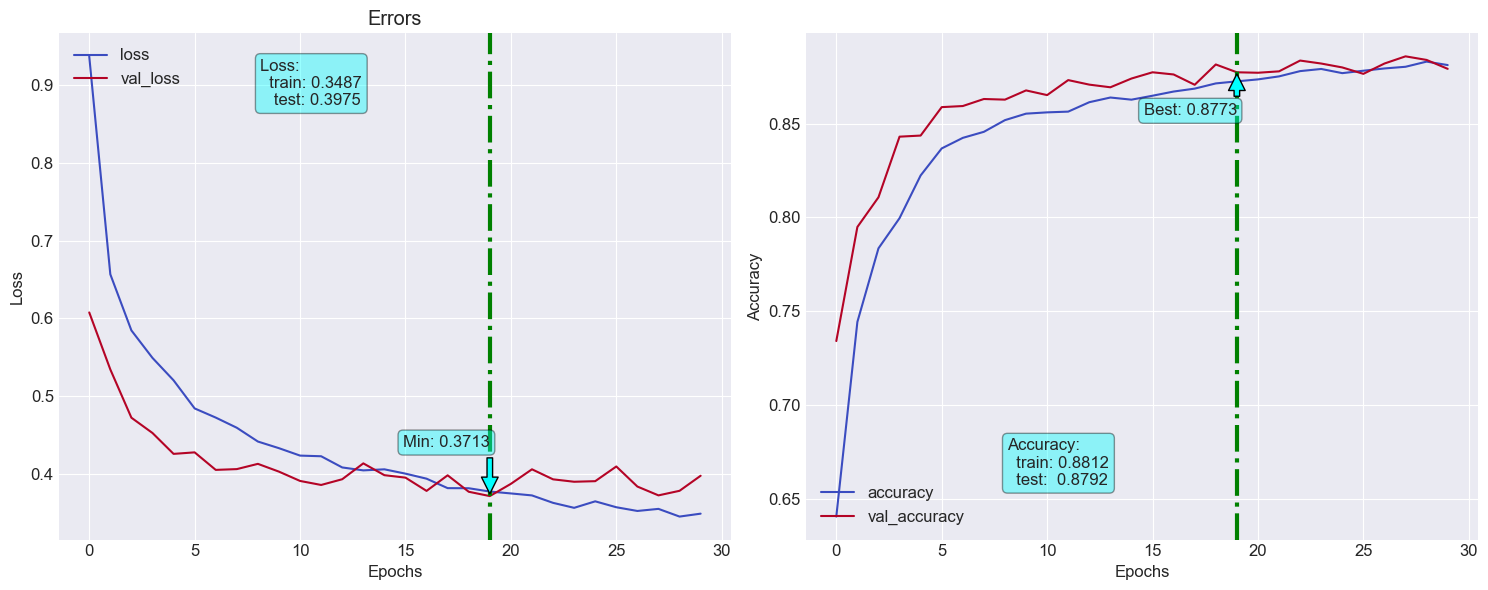

In [328]:
# Dropout = 0.2-0.3-0.4-0.2-0.3
hist_df = pd.DataFrame(history.history)
fn_plot_tf_hist(hist_df = hist_df)

In [364]:
## Early Stopping 

In [370]:
DOR0 = 0.1
DOR1 = 0.2
DOR2 = 0.3
DOR3 = 0.4
DOR4 = 0.5
DOR5 = 0.6

initializer = tf.keras.initializers.GlorotUniform(seed = RANDOM_STATE)
optimizer  = tf.keras.optimizers.Adam(learning_rate=ALPHA)
#Define Regularizer
regularizer = tf.keras.regularizers.L2(0.05)

inputs = tf.keras.Input(shape=(train_shape[1],), name = 'input')
#Set1
x = tf.keras.layers.Dense(392, 
                         #activation = tf.keras.activations.relu,
                          kernel_initializer=initializer,
                          #use_bias=False,
                         name = 'fc_1')(inputs)
#x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation(activation='relu')(x)
#x = tf.keras.layers.Dropout(rate = DOR5)(x)
# Set2
x = tf.keras.layers.Dense(196, 
                         #activation = tf.keras.activations.relu,
                          kernel_initializer=initializer,
                          use_bias=False,
                         name = 'fc_2')(x)
#x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation(activation='relu')(x)
#x = tf.keras.layers.Dropout(rate = DOR4)(x)

#Set3
x = tf.keras.layers.Dense(98, 
                         #activation = tf.keras.activations.relu,
                          kernel_initializer=initializer,
                          use_bias=False,
                         name = 'fc_3')(x)
#x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation(activation='relu')(x)
#x = tf.keras.layers.Dropout(rate = DOR3)(x)

#Set4
x = tf.keras.layers.Dense(49, 
                         #activation = tf.keras.activations.relu,
                          kernel_initializer=initializer,
                          use_bias=False,
                         name = 'fc_4')(x)

#x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation(activation='relu')(x)
#x = tf.keras.layers.Dropout(rate = DOR2)(x)

#Set5
x = tf.keras.layers.Dense(24, 
                         #activation = tf.keras.activations.relu,
                          kernel_initializer=initializer,
                          use_bias=False,
                         name = 'fc_5')(x)

#x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation(activation='relu')(x)
#x = tf.keras.layers.Dropout(rate = DOR1)(x)

# x = tf.keras.layers.Dense(196, 
#                          activation = tf.keras.activations.relu,
#                          name = 'fc_6')(x)
outputs = tf.keras.layers.Dense(10,kernel_initializer=initializer,
                                use_bias=False,
                                name='output')(x)
model3 = tf.keras.Model(inputs= inputs, outputs = outputs, name ='MNIST')
display(model3.summary())

Model: "MNIST"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_1 (Dense)                         │ (None, 392)                 │         307,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_43 (Activation)           │ (None, 392)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_2 (Dense)                         │ (None, 196)                 │          76,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_44 (Activation)           │ (None, 196)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_3 (Dense)                         │ (None, 98)                  │          19,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_45 (Activation)           │ (None, 98)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_4 (Dense)                         │ (None, 49)                  │           4,802 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_46 (Activation)           │ (None, 49)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_5 (Dense)                         │ (None, 24)                  │           1,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_47 (Activation)           │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │             240 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 409,978 (1.56 MB)

 Trainable params: 409,978 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

None

In [372]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True) # y_test, y_pred shape should be equal
optimizer = tf.keras.optimizers.Adam(learning_rate=ALPHA)

model3.compile(optimizer = optimizer, # optimisation, loss calculation 
             loss = loss_fn,
              metrics = ['accuracy']
             )
history = model3.fit(train_ds,#x = X_train, y = y_train, 
                    validation_data = test_ds,#[X_test, y_test],
                    batch_size = BATCH_SIZE,
                    verbose = 2,
                    epochs =EPOCHS
                   )



Epoch 1/50
1500/1500 - 8s - 6ms/step - accuracy: 0.8068 - loss: 0.5357 - val_accuracy: 0.8544 - val_loss: 0.3968
Epoch 2/50
1500/1500 - 6s - 4ms/step - accuracy: 0.8568 - loss: 0.3929 - val_accuracy: 0.8621 - val_loss: 0.3741
Epoch 3/50
1500/1500 - 6s - 4ms/step - accuracy: 0.8703 - loss: 0.3520 - val_accuracy: 0.8698 - val_loss: 0.3576
Epoch 4/50
1500/1500 - 6s - 4ms/step - accuracy: 0.8787 - loss: 0.3265 - val_accuracy: 0.8713 - val_loss: 0.3604
Epoch 5/50
1500/1500 - 6s - 4ms/step - accuracy: 0.8877 - loss: 0.3046 - val_accuracy: 0.8704 - val_loss: 0.3672
Epoch 6/50
1500/1500 - 6s - 4ms/step - accuracy: 0.8919 - loss: 0.2918 - val_accuracy: 0.8712 - val_loss: 0.3752
Epoch 7/50
1500/1500 - 6s - 4ms/step - accuracy: 0.8980 - loss: 0.2734 - val_accuracy: 0.8771 - val_loss: 0.3538
Epoch 8/50
1500/1500 - 6s - 4ms/step - accuracy: 0.9018 - loss: 0.2635 - val_accuracy: 0.8817 - val_loss: 0.3425
Epoch 9/50
1500/1500 - 6s - 4ms/step - accuracy: 0.9058 - loss: 0.2511 - val_accuracy: 0.8788 - 

In [380]:
chkptPATH = os.path.join(modelDir, subDir, 'all_in.keras')
chkpt_cb = tf.keras.callbacks.ModelCheckpoint(chkptPATH,
                                             monitor = 'val_loss',
                                             verbose =2,
                                             save_best_only=True
                                        )

es_cb = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                        verbose =2,
                                        patience= PATIENCE,
                                         restore_best_weights= True
                                        )

lr_cb = tf.keras.callbacks.ReduceLROnPlateau(
                                        monitor = 'val_loss',
                                        factor= LR_FACTOR,
                                        verbose =2,
                                        patience= LR_PATIENCE
                                         )

In [382]:
history = model3.fit(train_ds,#x = X_train, y = y_train, 
                    validation_data = test_ds,#[X_test, y_test],
                    batch_size = BATCH_SIZE,
                    verbose = 2,
                    epochs =EPOCHS,
                     callbacks = [chkpt_cb,lr_cb,es_cb]
                   )

Epoch 1/50

Epoch 1: val_loss improved from inf to 0.62361, saving model to ./models\fashion_mnist\all_in.keras
1500/1500 - 6s - 4ms/step - accuracy: 0.9637 - loss: 0.0959 - val_accuracy: 0.8878 - val_loss: 0.6236 - learning_rate: 0.0010
Epoch 2/50

Epoch 2: val_loss improved from 0.62361 to 0.60989, saving model to ./models\fashion_mnist\all_in.keras
1500/1500 - 6s - 4ms/step - accuracy: 0.9640 - loss: 0.0944 - val_accuracy: 0.8865 - val_loss: 0.6099 - learning_rate: 0.0010
Epoch 3/50

Epoch 3: val_loss did not improve from 0.60989
1500/1500 - 6s - 4ms/step - accuracy: 0.9638 - loss: 0.0946 - val_accuracy: 0.8832 - val_loss: 0.6703 - learning_rate: 0.0010
Epoch 4/50

Epoch 4: val_loss did not improve from 0.60989
1500/1500 - 6s - 4ms/step - accuracy: 0.9635 - loss: 0.0969 - val_accuracy: 0.8867 - val_loss: 0.6537 - learning_rate: 0.0010
Epoch 5/50

Epoch 5: val_loss did not improve from 0.60989
1500/1500 - 6s - 4ms/step - accuracy: 0.9659 - loss: 0.0920 - val_accuracy: 0.8898 - val_lo

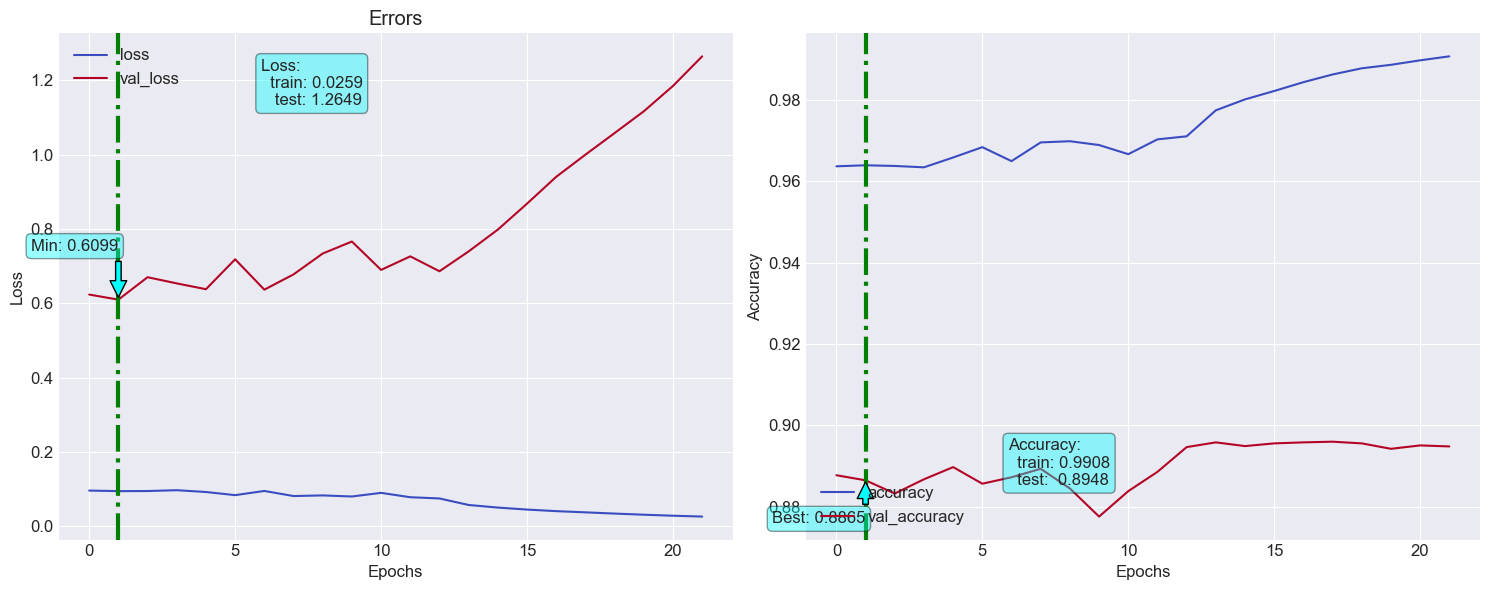

In [384]:
fn_plot_tf_hist(pd.DataFrame(history.history))

* Don't look Down

In [78]:
# # data is coming in batches from train_ds
# y_true, y_pred = [],[]
# for feat, lbls in train_ds: #for count, data in enumerate(train_ds):
#     #feat, lbls = data
#     #print(count,feat.shape, lbls.shape) 
#     pred = prediction_model(feat).numpy() # getting 4 prediction 
#     pred  = pred.argmax(axis=1) # here we get prediction of 1 class/ feature which has highest probability
#     #print(type(pred))
#     y_true.extend(lbls) # Append 
#     y_pred.extend(pred)
# len(y_true), len(y_pred)

In [79]:
# print(classification_report(y_true,y_pred)) #Support : is the number of actual occurrences of each class in the dataset

In [80]:
# fn_plot_confusion_matrix(y_true,y_pred,labels=class_labels)

## For test dataset

In [82]:
# y_true, y_pred = [],[]
# for feat, lbls in test_ds: #for count, data in enumerate(train_ds):
#     #feat, lbls = data
#     #print(count,feat.shape, lbls.shape) 
#     pred = prediction_model(feat).numpy()
#     pred  = pred.argmax(axis=1) # max features index
#     #print(type(pred))
#     y_true.extend(lbls)
#     y_pred.extend(pred)
# len(y_true), len(y_pred)

In [83]:
# print(classification_report(y_true,y_pred)) #Support : is the number of actual occurrences of each class in the dataset

In [84]:
# fn_plot_confusion_matrix(y_true,y_pred,labels=class_labels)

In [85]:
# y_pred = model.predict(X_train)
# accuracy_score(y_true= y_train, y_pred = y_pred.argmax(axis=1))

In [86]:
# cm = confusion_matrix(y_true=y_train, y_pred= y_pred.argmax(axis=1))
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_labels)
# fig,ax = plt.subplots(figsize=(4,4))
# disp.plot(ax=ax, cmap= 'Blues', colorbar = False)
# ax.grid(False)

In [87]:
# y_pred = model.predict(X_test)
# accuracy_score(y_true= y_test, y_pred = y_pred.argmax(axis=1))

In [88]:
# cm = confusion_matrix(y_true=y_test, y_pred= y_pred.argmax(axis=1))
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_labels)
# fig,ax = plt.subplots(figsize=(4,4))
# disp.plot(ax=ax, cmap= 'Blues', colorbar = False)
# ax.grid(False)

In [89]:
# # sample DATA plot: Display a grid of images from the dataset along with their labels

# n_rows =  8 # Number of rows to display in the grid
# n_cols = 8 # Number of columns

# # randomly sample 'n_rows' * n_cols images from the dataset
# plot_df = data_df.sample(n = n_rows * n_cols)

# #create a new figure for the grid of images with a specified size
# fig = plt.figure(figsize  =(15,12))

# #Adjus
# fig.subplots_adjust(left = 0, right = 1, bottom=0, top = 1, hspace =0.05, wspace = 0.05)

## DONOT Look Down

In [91]:
# train.csv -> Train, valid dataset
# accuracy -> predcition on test data


In [92]:
# model = tf.keras.Sequential([
#     tf.keras.Input(shape=(2,), name = 'input'), # input layer
#     tf.keras.layers.Dense(5, activation = 'relu', name = 'fc_1'), # Hidden layer called dense in tensorflow
#     tf.keras.layers.Dense(5, activation = 'relu',  name = 'fc_2'),# node called as unit
#     tf.keras.layers.Dense(4, activation = 'relu', name = 'fc_3'),# fully connected layer(Fc)
#     tf.keras.layers.Dense(3, activation = 'relu',  name = 'fc_4'),
#     tf.keras.layers.Dense(2, name = 'output')
    
# ])

In [93]:
 # tf.keras.layers.Dense?


In [94]:
## Unit testing

In [95]:
# prediction = model(X_train[:1]).numpy()
# prediction.sum()

In [96]:
# tf.nn.softmax(prediction).numpy().sum()

In [97]:
# model.summary()

In [98]:
# tf.keras.utils.plot_model(model, "My_first_model.png",
#                          show_shapes = True,show_dtype=True,
#                          show_layer_names = True)

In [99]:
# loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True) # y_test, y_pred shape should be equal

In [100]:
# loss_fn(y_train[:1], prediction).numpy()

In [101]:
# model.compile(optimizer = 'adam', # optimisation, loss calculation 
#              loss = loss_fn,
#               metrics = ['accuracy']
#              )

In [102]:
# history = model.fit(x = X_train, y = y_train, 
#                     validation_data = [X_test, y_test],
#                     epochs =EPOCHS
#                    )

In [103]:
# hist_df = pd.DataFrame(history.history) #Dictionary
# display(hist_df.head())
# fig, axes = plt.subplots(1,2)
# hist_df.plot(y=['loss', 'val_loss'], ax= axes[0])
# hist_df.plot(y=['accuracy', 'val_accuracy'], ax = axes[1])

In [104]:
# pd.DataFrame(history.history)


In [105]:
# fn_plot_tf_hist(hist_df = hist_df)

In [106]:
# y_pred = model.predict(X_train)
# accuracy_score(y_true= y_train, y_pred = y_pred.argmax(axis=1))

In [107]:
# cm = confusion_matrix(y_true=y_train, y_pred= y_pred.argmax(axis=1))
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
# fig,ax = plt.subplots(figsize=(4,4))
# disp.plot(ax=ax, cmap= 'Blues', colorbar = False)
# ax.grid(False)

In [108]:
# y_pred = predict(model, X_test)
# accuracy_score(y_true = y_test, y_pred = y_pred)


In [109]:
#1.1**1000

In [110]:
################### Don't look Down

In [111]:
# rng = np.random.default_rng(seed=RANDOM_STATE)
# def train_weights(train, alpha, n_epoch):
#     errors = []
#     weights = rng.random(data_train.shape[1]) # randomly generated weights
#     m= train.shape[0] # number of samples
#     for epoch in range(n_epoch):
#         sum_error = 0.0
#         for row in train:
#             prediction = predict(row, weights)
#             dz = prediction - row[-1] # a-y
#             sum_error +=  - row[-1] * np.log(prediction) # sum of squared error
#             weights[0] +=  - alpha * dz / m # calculating and adjusting weights by alpha multiplication and  divide with whole row no. to get error for whole set
#             for i in range(len(row) - 1):
#                 weights[i+1] += -alpha * row[i] * dz / m
#         errors.append(sum_error / m)
#     return errors, weights

In [112]:
# def predict(model, X_p):
#     W1, W2, W3, W4, W5 = model['W1'], model['W2'], model['W3'], model['W4'], model['W5']
#     b1,b2,b3,b4,b5 = model['b1'], model['b2'], model['b3'], model['b4'], model['b5']
#     # Layer1 
#     z1 = X_p.dot(W1) + b1 # Aggregation function
#     a1 = fn_actv(z1) ## Activation function
#     # Layer 2
#     z2 = a1.dot(W2) + b2 # Aggregation function
#     a2 = fn_actv(z2) ## Activation function
#     #Layer 3
#     z3 = a2.dot(W3) + b3 # Aggregation function
#     a3 = fn_actv(z3) ## Activation function
#      #Layer 4
#     z4 = a3.dot(W4) + b4 # Aggregation function
#     a4 = fn_actv(z4) ## Activation function
    
#      #Layer 5
#     z5 = a4.dot(W5) + b5 # Aggregation function
#     a5 = softmax(z5) ## Activation function

#     return a5.argmax(axis=1)


In [113]:
# def fn_calculate_loss(model, X_l, y_l):
#     W1, W2, W3, W4, W5 = model['W1'], model['W2'], model['W3'], model['W4'], model['W5']
#     b1,b2,b3,b4,b5 = model['b1'], model['b2'], model['b3'], model['b4'], model['b5']

#     m = X_l.shape[0]
    
#     # Layer1 
#     z1 = X_l.dot(W1) + b1 # Aggregation function
#     a1 = fn_actv(z1) ## Activation function
#     # Layer 2
#     z2 = a1.dot(W2) + b2 # Aggregation function
#     a2 = fn_actv(z2) ## Activation function
#     #Layer 3
#     z3 = a2.dot(W3) + b3 # Aggregation function
#     a3 = fn_actv(z3) ## Activation function
#      #Layer 4
#     z4 = a3.dot(W4) + b4 # Aggregation function
#     a4 = fn_actv(z4) ## Activation function
    
#      #Layer 5
#     z5 = a4.dot(W5) + b5 # Aggregation function
#     a5 = softmax(z5) ## Activation function
#     data_loss = -(y_l * np.log(a5) + (1 - y_l)*np.log(1-a5)).sum()
#     return data_loss / m

In [114]:
# def fn_actv(z):
#     return np.tanh(z)

# def fn_actv_prime(z): # Differentiation of Tanh()
#     return 1 - (np.tanh(z))**2

In [115]:
# fn_actv(np.array([[-1,0,1],[-np.inf,0,np.inf]]))

In [116]:
# def predict():
#     z = 1
#     return sigmoid(z) # stepwise Activation Function
        

In [117]:
# def fn_loss_calculate_loss():
#     pass

## Split DATA in Test Train

In [119]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE,stratify = y, random_state=RANDOM_STATE)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [120]:
# def build_model(param, X_t, y_t, n_epochs= EPOCHS, alpha = ALPHA):
#     '''
#     5-5-4-3
#     '''
#     # get dimensions for weights init
#     m = X_t.shape[0]
    
#     # initialize weights
#     W1 = rng.random((param[0], param[1]), dtype = np.float32) / np.sqrt(param[0])
#     W2 = rng.random((param[1], param[2]), dtype = np.float32)/np.sqrt(param[1])
#     W3 = rng.random((param[2], param[3]), dtype = np.float32)/np.sqrt(param[2]) 
#     W4 = rng.random((param[3], param[4]), dtype = np.float32)/np.sqrt(param[3])
#     W5 = rng.random((param[4], param[5]), dtype = np.float32)/np.sqrt(param[4])
    
#     # initialize bias
#     b1 = np.zeros((1,param[1]), dtype = np.float32)
#     b2 = np.zeros((1,param[2]), dtype = np.float32)
#     b3 = np.zeros((1,param[3]), dtype = np.float32)
#     b4 = np.zeros((1,param[4]), dtype = np.float32)
#     b5 = np.zeros((1,param[5]), dtype = np.float32)

#     # print(W1.shape, W2.shape, W3.shape, W4.shape, W5.shape)
#     # print(b1.shape, b2.shape, b3.shape, b4.shape, b5.shape)
    
#     curr_loss = 0
#     loss = []
#     # loss_hist = {}
#     epoch = []
#     for i in range(n_epochs):
#         ### Forwards propagation
#         # Layer1 
#         z1 = X_t.dot(W1) + b1 # Aggregation function
#         a1 = fn_actv(z1) ## Activation function
#         # Layer 2
#         z2 = a1.dot(W2) + b2 # Aggregation function
#         a2 = fn_actv(z2) ## Activation function
#     #Layer 3
#         z3 = a2.dot(W3) + b3 # Aggregation function
#         a3 = fn_actv(z3) ## Activation function
#          #Layer 4
#         z4 = a3.dot(W4) + b4 # Aggregation function
#         a4 = fn_actv(z4) ## Activation function

#          #Layer 5
#         z5 = a4.dot(W5) + b5 # Aggregation function
#         a5 = softmax(z5) ## Activation function

#     # # Layer2
#     #     z2 = a1.dot(W2) + b2 # Aggregation function
#     #     a2 = sigmoid(z2)# Activation function

#         ### Back Propagation
#         ## Layer 5
#         dz5 = a5 - y_t # y should be of shape (1,m)
        
#         dW5 = (a4.T).dot(dz5)
#         assert(W5.shape == dW5.shape), f'Shape: W5- {W5.shape} and dW5-{dW5.shape}'
#         db5 = np.sum(dz5, axis = 0, keepdims =True)
#         assert(b5.shape == db5.shape), f'Shape: b5- {b5.shape} and db5-{db5.shape}'
#         da4 = dz5.dot(W5.T)
#         assert(a4.shape == da4.shape), f'Shape: a4-{a4.shape} and da4-{da4.shape}'
#         # layer 4
#         dz4 = da4 * fn_actv_prime(z4)
#         dW4 = (a3.T).dot(dz4)
#         assert(W4.shape == dW4.shape),f'Shape: W4- {W4.shape} and dW4-{dW4.shape}'
#         db4 = np.sum(dz4, axis = 0, keepdims =True)
#         assert(b4.shape == db4.shape), f'Shape: b4- {b4.shape} and db4-{db4.shape}'
#         da3 = dz4.dot(W4.T)
#         assert(a3.shape == da3.shape), f'Shape: a3-{a3.shape} and da3-{da3.shape}'

#         # layer3
#         dz3 = da3 * fn_actv_prime(z3)
#         dW3 = (a2.T).dot(dz3)
#         assert(W3.shape == dW3.shape),f'Shape: W3- {W3.shape} and dW3-{dW3.shape}'
#         db3 = np.sum(dz3, axis = 0, keepdims =True)
#         assert(b3.shape == db3.shape), f'Shape: b3- {b3.shape} and db3-{db3.shape}'
#         da2 = dz3.dot(W3.T)
#         assert(a2.shape == da2.shape), f'Shape: a2-{a2.shape} and da2-{da2.shape}'

#         #Layer2
#         dz2 = da2 * fn_actv_prime(z2)
#         dW2 = (a1.T).dot(dz2)
#         assert(W2.shape == dW2.shape), f'Shape: W2- {W2.shape} and dW2-{dW2.shape}'
#         db2 = np.sum(dz2, axis = 0, keepdims =True)
#         assert(b2.shape == db2.shape), f'Shape: b2- {b2.shape} and db2-{db2.shape}'
#         da1 = dz2.dot(W2.T)    
#         assert(a1.shape == da1.shape), f'Shape: a1-{a1.shape} and da1-{da1.shape}'

#         #layer1
#         dz1 = da1 *fn_actv_prime(z1)
#         assert(z1.shape == dz1.shape),f'Shape: z1-{z1.shape} and dz1-{dz1.shape}'
#         dW1 = (X_t.T).dot(dz1)
#         assert(W1.shape == dW1.shape), f'Shape: W1-{W1.shape} and dW1-{dW1.shape}'
#         db1 = np.sum(dz1, axis = 0, keepdims = True)
#         assert(b1.shape == db1.shape), f'Shape: b1-{b1.shape} and db1-{db1.shape}' # assert kind of exception handling
#                 # if shape don't match it fire error, if true do nothing


        
        


        
        
        
        

#         ## Gradient Update
#         W1 += -alpha *dW1 /m
#         W2 += -alpha *dW2 /m
#         W3 += -alpha *dW3 /m
#         W4 += -alpha *dW4 /m
#         W5 += -alpha *dW5 /m
#         b1 += -alpha *db1 /m
#         b2 += -alpha *db2 /m
#         b3 += -alpha *db3 /m
#         b4 += -alpha *db4 /m
#         b5 += -alpha *db5 /m

#         model = {'W1': W1,'W2':W2,'W3':W3, 'W4':W4, 'W5': W5,
#                 'b1': b1, 'b2':b2, 'b3':b3, 'b4':b4, 'b5':b5                
#                 }
        
#         if i%100==0:
#             curr_loss = fn_calculate_loss(model, X_t, y_t)
#             loss.append(curr_loss)
#             epoch.append(i)
            
#         if i%1000 == 0:
#            print(f'Loss after {i:>5d} epochs : {curr_loss:0.5f}')

#     # printing the error reduction curve
#     loss_hist['epoch'] = epoch
#     loss_hist['loss'] = loss
#     fig, ax = plt.subplots()
#     ax.plot(loss)
    
    
#     return model
    

In [121]:
# loss_hist = {}
# layer_params = [X_train.shape[1], 50,50,40,30,y_train.shape[1]]#[2,5,5,4,3,2]
# #y_train = y_train.reshape(-1,1)
# #y_train.shape

In [122]:
# y_train = y_train.reshape(-1,1)
# y_train.shape

In [123]:
# loss_hist = {}


In [124]:
# model = build_model(layer_params,X_train,y_train )

In [125]:
# pd.DataFrame(loss_hist).plot(x='epoch', y='loss');

In [126]:
# y_pred = predict(model, X_train)
# accuracy_score(y_true = y_train.argmax(axis=1), y_pred = y_pred)


In [127]:
# cm = confusion_matrix(y_true=y_train.argmax(axis=1), y_pred= y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
# fig,ax = plt.subplots(figsize=(4,4))
# disp.plot(ax=ax, cmap= 'Blues', colorbar = False)
# ax.grid(False)

In [128]:
# y_pred = predict(model, X_test)
# accuracy_score(y_true = y_test.argmax(axis=1), y_pred = y_pred)


In [129]:
# cm = confusion_matrix(y_true=y_test.argmax(axis=1), y_pred= y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
# fig,ax = plt.subplots(figsize=(4,4))
# disp.plot(ax=ax, cmap= 'Blues', colorbar = False)
# ax.grid(False)

In [130]:
# def fn_plot_decision_boundary(model, X_tr, y_tr, X_ts, y_ts):
#     fig, ax = plt.subplots(figsize =(8,5))
#     dm = 0.05
#     # Min and Max Along Two Axis 
#     x_min, x_max = X_tr[:,0].min(), X_tr[:,0].max()
#     y_min, y_max = X_tr[:,1].min(), X_tr[:,1].max()

#     display(x_min, x_max)
#     display(y_min, y_max)

#     ## generate a mesh grid
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, dm), 
#                     np.arange(y_min, y_max, dm))
#     display(xx.shape,yy.shape)
#     # ravel means 2d -> 1d
    
#     XX = np.c_[xx.ravel(), yy.ravel()]
#     display(XX.shape)
    
#     y_pred = predict(model,XX)
#     display(y_pred.shape)
#     Z = np.array(y_pred).reshape(xx.shape)
#     ax.contourf(xx, yy, Z, alpha = 0.8 , cmap = plt.cm.Paired)
#     ax.scatter(X_tr[:,0], X_tr[:,1], c = y_tr.argmax(axis=1), edgecolors = 'k', cmap=CMAP)
#     ax.scatter(X_ts[:,0], X_ts[:,1], c = y_ts.argmax(axis=1), edgecolors = 'k', cmap=CMAP, marker ='*')


In [131]:
# fn_plot_decision_boundary(model, X_train, y_train, X_test, y_test)